In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
rank = pd.read_csv(r'C:\Users\Rishabh Johri\Downloads\world-university-rankings\timesData.csv')

In [3]:
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


In [4]:
rank.describe()

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


In [5]:
list(rank.columns.values)

['world_rank',
 'university_name',
 'country',
 'teaching',
 'international',
 'research',
 'citations',
 'income',
 'total_score',
 'num_students',
 'student_staff_ratio',
 'international_students',
 'female_male_ratio',
 'year']

In [6]:
rank.year.unique()

array([2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

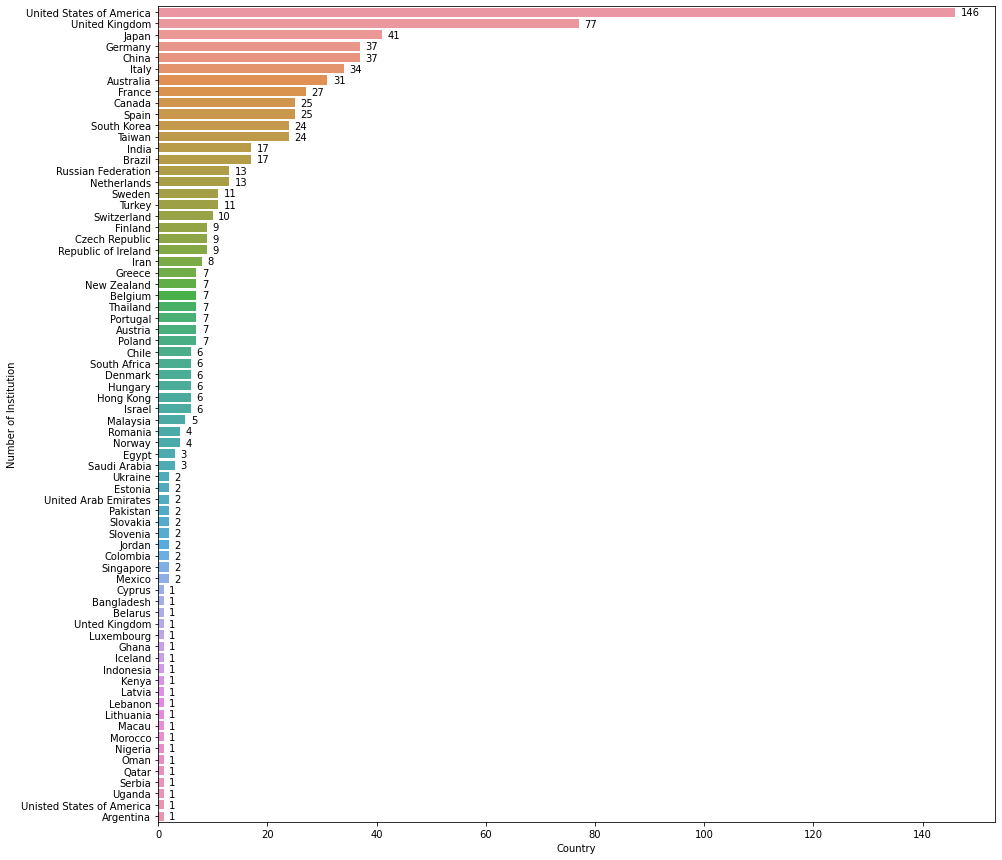

In [7]:
ins_count = rank[rank['year'] == 2016].groupby('country').size().sort_values(ascending = False)
plt.figure(figsize = (15,15))
ax = sns.barplot(x = ins_count.values, y = ins_count.index)
ax.set(xlabel = 'Country', ylabel = 'Number of Institution')
for i in ax.patches:
    ax.text(i.get_width()+1.0, i.get_y()+0.7,i.get_width().astype(int))
plt.show()

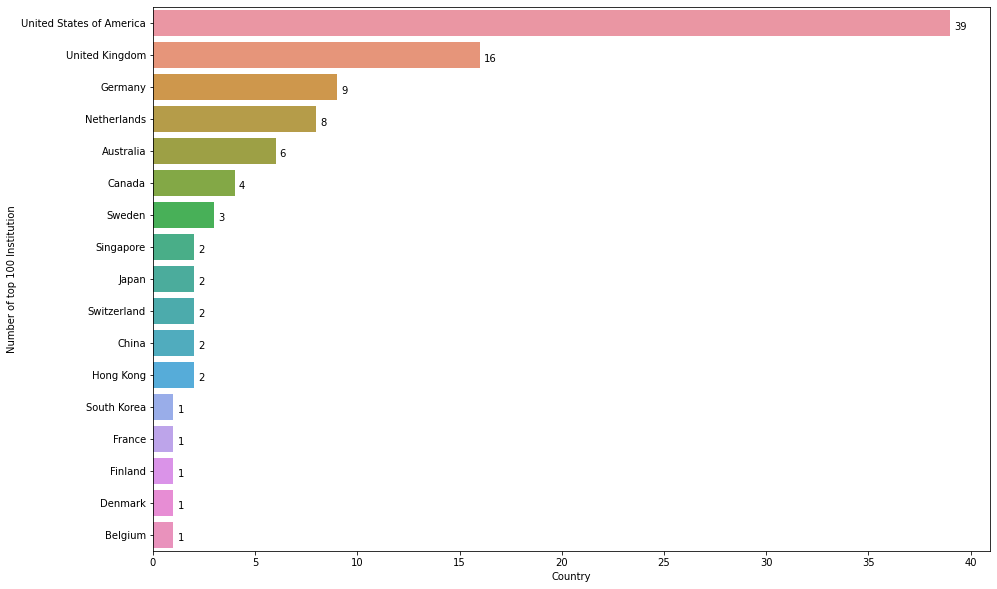

In [8]:
top_count = rank[rank['year'] == 2016].head(100).groupby('country').size().sort_values(ascending = False)
plt.figure(figsize = (15,10))
ax = sns.barplot(x = top_count.values, y = top_count.index)
ax.set(xlabel = 'Country', ylabel = 'Number of top 100 Institution')
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.6,i.get_width().astype(int))
plt.show()

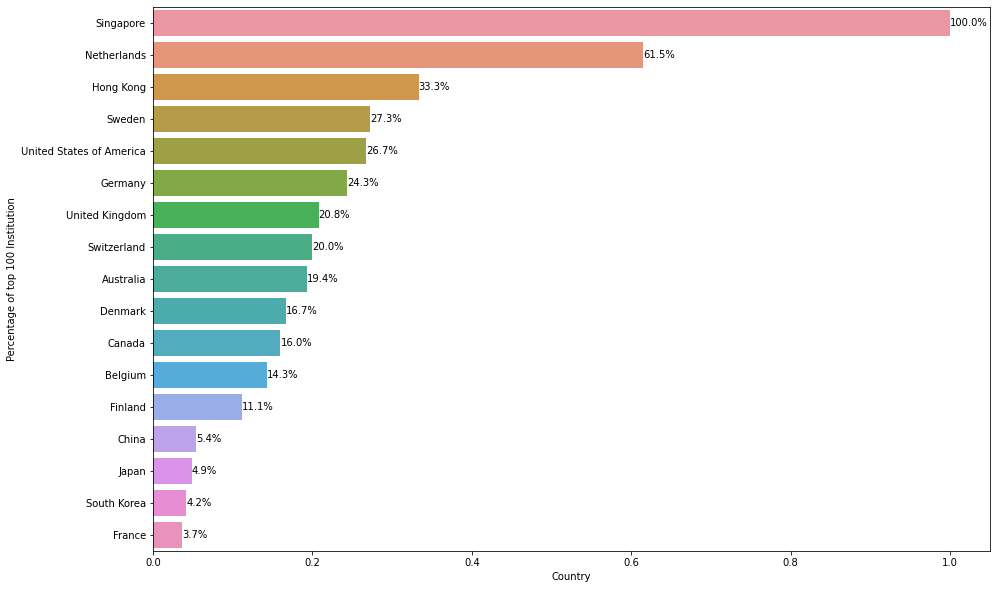

In [9]:
per_count = top_count/ins_count
per_count.dropna(inplace = True)
per_count.sort_values(ascending = False, inplace = True)
plt.figure(figsize = (15,10))
ax = sns.barplot(x = per_count.values, y = per_count.index)
ax.set(xlabel = 'Country', ylabel = 'Percentage of top 100 Institution')
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+0.5,str(round(i.get_width()*100,1))+'%')
plt.show()

In [10]:
university_name = list(rank.university_name.unique())
non_decreasing = pd.DataFrame(data=university_name,columns=['university_name'])
non_decreasing.head()

,university_name
0,Harvard University
1,California Institute of Technology
2,Massachusetts Institute of Technology
3,Stanford University
4,Princeton University


In [11]:
def non_decreasing_rank(university_name):
    world_rank = list(rank[rank.university_name == university_name]['world_rank'])
    count = rank.groupby('university_name').size()[university_name]
    for i in range(1,count): #1,2,3
        if world_rank[i-1] < world_rank[i]:
            return False
    return True

non_decreasing[non_decreasing['university_name'].apply(non_decreasing_rank) == True]

,university_name
1,California Institute of Technology
45,University of Wisconsin
47,École Polytechnique Fédérale de Lausanne
59,New York University
233,Ulm University
...,...
813,Xidian University
814,Yeungnam University
815,Yıldız Technical University
816,Yokohama City University


In [12]:
rank2015_raw = rank[rank.year == 2015]
rank2015_raw.drop(['country','year'],axis = 1, inplace = True)
rank2015_raw.head()

C:\Users\Rishabh Johri\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,world_rank,university_name,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio
1402,1,California Institute of Technology,92.2,67.0,98.1,99.7,89.1,94.3,"2,243",6.9,27%,33 : 67
1403,2,Harvard University,92.9,67.6,98.6,98.9,44.0,93.3,"20,152",8.9,25%,NaN
1404,3,University of Oxford,88.6,90.7,97.7,95.5,72.9,93.2,"19,919",11.6,34%,46 : 54
1405,4,Stanford University,91.5,69.0,96.7,99.1,63.1,92.9,"15,596",7.8,22%,42 : 58
1406,5,University of Cambridge,89.7,87.8,95.6,95.2,51.1,92.0,"18,812",11.8,34%,46 : 54


In [13]:
rank2015_raw.isnull().sum()

world_rank                 0
university_name            0
teaching                   0
international              0
research                   0
citations                  0
income                     0
total_score                0
num_students              11
student_staff_ratio       11
international_students    12
female_male_ratio         38
dtype: int64

In [14]:
rank2015_raw.fillna(method='ffill',inplace = True)

C:\Users\Rishabh Johri\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [15]:
rank2015_raw.isnull().sum()

world_rank                0
university_name           0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
female_male_ratio         0
dtype: int64

In [16]:
rank2015_raw.isin(['-']).sum()

world_rank                  0
university_name             0
teaching                    0
international               0
research                    0
citations                   0
income                     20
total_score               200
num_students                0
student_staff_ratio         0
international_students      0
female_male_ratio           0
dtype: int64

In [17]:
rank2015_raw = rank2015_raw[(~rank2015_raw['total_score'].isin(['-']))&(~rank2015_raw['income'].isin(['-']))]
rank2015_raw.isin(['-']).sum()

world_rank                0
university_name           0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
female_male_ratio         0
dtype: int64

In [18]:
col = list(rank2015_raw.columns.values)

for i in range(2,8):
    rank2015_raw[col[i]] = pd.to_numeric(rank2015_raw[col[i]])

In [19]:
rank2015_raw.shape

(188, 12)

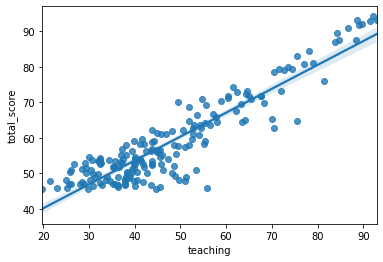

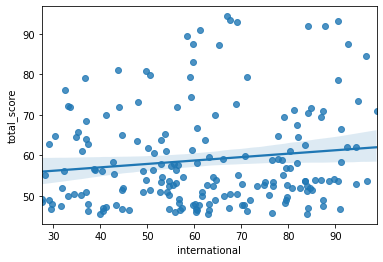

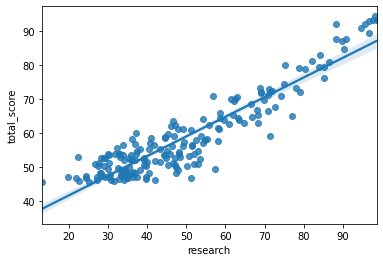

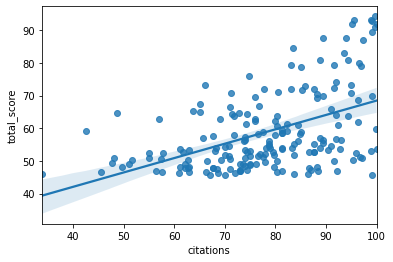

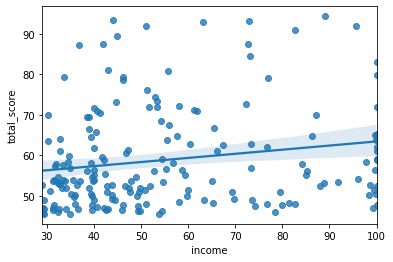

In [20]:
factor = col[2:7]
for i in range(len(factor)):
    z = rank2015_raw[factor[i]]
    plt.figure(i)
    sns.regplot(x=z, y='total_score', data = rank2015_raw)

In [21]:
cor = pd.DataFrame()
for i in range(len(factor)):
    cor[factor[i]] = rank2015_raw[factor[i]]
cor['total_score'] = rank2015_raw.total_score
cor.corr() 

,teaching,international,research,citations,income,total_score
teaching,1.000000,-0.053589,0.917052,0.193439,0.225508,0.915469
international,-0.053589,1.000000,0.039631,0.056968,-0.036396,0.130251
research,0.917052,0.039631,1.000000,0.164893,0.258663,0.924404
citations,0.193439,0.056968,0.164893,1.000000,-0.219629,0.484386
income,0.225508,-0.036396,0.258663,-0.219629,1.000000,0.184958
total_score,0.915469,0.130251,0.924404,0.484386,0.184958,1.000000


In [22]:
score = rank2015_raw.total_score
train = rank2015_raw[factor] 
lab_enc = preprocessing.LabelEncoder()
score_encoded = lab_enc.fit_transform(score)

In [23]:
x_train, y_train, x_test, y_test = train_test_split(train,score_encoded,train_size = 0.9, random_state = 0)

In [24]:
tree = DecisionTreeClassifier()
tree.fit(x_train,x_test)
y_pred = tree.predict(y_train)
y1 = lab_enc.inverse_transform(y_test)
y2 = lab_enc.inverse_transform(y_pred)

[[1.         0.94278098]
 [0.94278098 1.        ]]


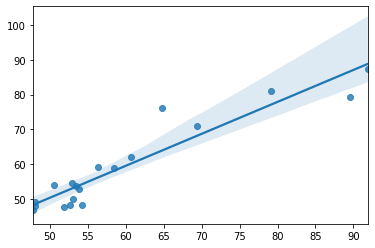

In [25]:
print(np.corrcoef(y1,y2))
sns.regplot(y1,y2)